<a href="https://colab.research.google.com/github/jasreman8/GenAI-Foundational-Projects/blob/main/Prompt_Engineering_Fundamentals_for_Customer_Support_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prompt Engineering Fundamentals

## Problem Statement

### Business Context

### Customer Support Automation

An online food and grocery delivery platform is expanding its services across various cities in the country but is now facing an increase in customer complaints.

The limited support team struggles to meet service level agreements (SLAs) due to the scaled operations, resulting in slow, inconsistent, and inefficient responses to customer inquiries.

To address these growing challenges, the company plans to leverage LLM-powered prompt engineering techniques to automate and enhance customer support interactions, thereby reducing response time and improving accuracy.


## Objective


The product team has identified the following support tasks to be automated through prompt engineering techniques:

1. **Categorization of Customer Requests**:

The application receives thousands of customer inquiries daily through emails and in-app chat.

All incoming content will be ingested in real-time and processed sequentially by the support team. The proposal is to use LLMs to automatically categorize these requests into following distinct categories:
  - Generic Inquiries
  - Refund Requests
  - Complaint
  - Order Status
  - Policy-Aligned Response

2. **Generic Inquiries**:

Support agents currently spend excessive time drafting responses to repetitive inquiries.

By employing prompt engineering techniques, a standard template can be created to generate consistent response for the generic queries using sample format(s).

3. **Refund Requests**:

Handling refund requests involves multiple condition checks, such as evaluating eligibility based on purchase date and the company policy.

This should be treated as a separate task within prompt engineering.

4. **Order Status Queries**:

Customer requests to track their order status involve multiple steps and require connecting to three different entities i.e. Payment, Restaurant/grocery shop or warehouse, and Delivery Partner.

This complexity necessitates treating it as a separate prompt engineering task.

5. **Policy-Related Queries**:

For inquiries related to company policy, such as understanding the terms for promotional coupons, loyalty points, or detailed refund eligibility criteria that involve complex conditions, ensure that AI responses thoroughly align with documented policy guidelines.

It is critical to avoid discrepancies across responses to maintain consistency and trust for such queries.

6. **Handling Complaints**:

For any user complaints regarding service quality, ensure that responses are polite, helpful, and empathetic.

By following these strategies and employing AI-driven solutions, the company aims to enhance customer satisfaction and streamline operations, ultimately improving the overall quality of service and achieving customer satisfaction more effectively.


## Methodology

### Mapping Tasks with Prompt Templates




The support tasks should be mapped appopriately such that the strengths of each prompt engineering technique should be leveraged while addressing the specific challenges of customer support automation.

Here're a few considerations that need to be kept in mind while selecting the appropriate prompt engineering technique:
- Simple tasks such as classification, simple Q&A can be achieved via shot-based prompting techniques (shot-prompting)
- Complex decision making may require systematic reasoning for improved accuracy (CoT, prompt chaining, etc.)
- Queries that require careful handling (especially policy) may require double-check and verification i.e. self-consistency checks before the response is provided to the user

Lets map the identified support tasks with the appropriate prompting technique.

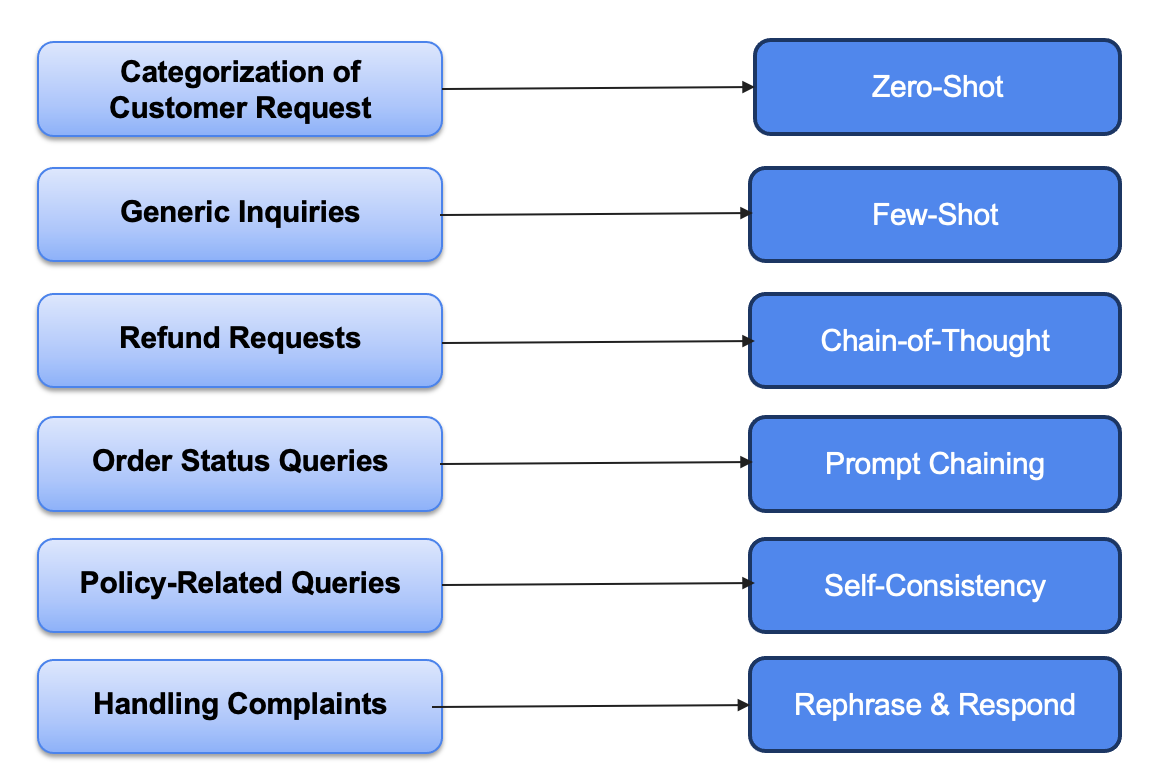

1. **Categorization of Customer Requests → Zero-Shot Prompting**

Zero-shot prompting is ideal for text classification tasks where the model can understand and execute categorization without prior examples.

Since the categories (Generic Inquiries, Refund Requests, Complaint, Order Status, Policy-Aligned Response) are well-defined and straightforward, the LLM can leverage its pre-trained knowledge to classify incoming requests accurately.


2. **Generic Inquiries → Few-Shot Prompting**

Few-shot prompting works by providing the model with a small set of input-output pairs that demonstrate the desired response format and style.

For generic inquiries, you need consistent template-based responses that maintain a specific tone and structure.

By providing several examples of well-crafted responses to common questions, the model learns the pattern and can generate similar high-quality responses for new generic inquiries.


3. **Refund Requests → Chain-of-Thought Prompting**

Refund processing involves multiple condition checks including purchase date evaluation, policy compliance, and eligibility criteria assessment.

Chain-of-thought prompting encourages the model to break down complex problems into smaller, logically coherent segments and articulate intermediate reasoning steps.

This ensures the AI systematically evaluates each condition before making a refund decision, reducing errors in complex scenarios.


4. **Order Status Queries → Prompt Chaining**

Order tracking requires connecting to multiple entities (Payment, Restaurant/warehouse, Delivery Partner) in a sequential manner.

Prompt chaining is perfect for this as it links prompts together to tackle complex jobs by splitting work into clear, focused steps.

Each step's output (payment status, preparation status, delivery status) flows into the next prompt, creating a comprehensive order status response.


5. **Policy-Related Queries → Self-Consistency Prompting**

Policy queries involve complex conditions and require maintaining consistency and trust across responses.

Self-consistency prompting generates multiple reasoning paths and selects the most consistent answer, which is crucial for avoiding discrepancies in policy interpretation.

This technique ensures that responses align with documented guidelines and maintains reliability, especially for complex policy scenarios involving promotional coupons, loyalty points, and refund eligibility.


6. **Handling Complaints → Rephrase & Respond**

Complaint handling requires careful understanding of the customer's concern before crafting an appropriate response.

The rephrase & respond technique allows the system to first rephrase the complaint to ensure accurate comprehension of the issue, then generate a response that is polite, helpful, and empathetic.

This two-step process ensures that the emotional context and specific details of the complaint are properly addressed.

#### Installing and using the OpenAI API Key

In [1]:
# Installing the OpenAI library
!pip install -q openai==1.66.3

In [2]:
# Importing the required libraries
from openai import OpenAI
from google.colab import userdata

# Set the OpenAI key in Colab Secrets
openai_api_key = userdata.get('my_api_key') # Replace with the appropriate secret key name

client = OpenAI(
    api_key = openai_api_key,
)

# GPT-4o-mini will be the primary model used in this notebook
model_name = 'gpt-4o-mini'

The following codes will feature the prompt engineering techniques used for automating the customer support tasks for the business case study.

### Customer Requests Categorization : Zero-Shot Prompting Technique

The online delivery platform receives thousands of daily inquiries across various channels.

By utilizing Zero-Shot LLM prompting, these inquiries shall be categorized in real-time, leveraging the model's contextual understanding to eliminate training requirements and ensure accurate routing for quicker resolutions.

Let's define the system message first.

The system message below has the role of a **customer support classifier** that analyses the incoming customer messages and categorize them into (only) one of the following categories - **Generic Inquiries, Refund Requests, Complaint, Order Status, Policy**

In [3]:
# Providing the role, context and instructions to the system message
# This system message prompt sets the context to classify the input user query into one of the 5 classes
# Generic Inquiries, Refund Requests, Complaint, Order Status, Policy-Aligned Response

zero_shot_system_message = """
You are a customer support classifier for an online food and grocery delivery platform.
Your task is to analyze incoming customer messages and categorize them into one of the following predefined categories based on their intent:

1. **Generic Inquiries** – General questions about services, menu items, delivery areas, or non-urgent requests (e.g., "What time do you close?").
2. **Refund Requests** – Explicit or implied requests for reimbursement due to order issues (e.g., "I received the wrong item, can I get a refund?").
3. **Complaint** – Expressions of dissatisfaction regarding service, delivery, or product quality (e.g., "My order arrived late and cold.").
4. **Order Status** – Queries about the real-time status or ETA of an order (e.g., "Where is my order #12345?").
5. **Policy-Aligned Response** – Questions requiring verbatim adherence to company policies (e.g., "What’s your return policy for perishable items?").

Respond **only** with the exact category name from the list above. Do not provide explanations or additional text.
"""

Let's define a few sample customer input queries and check the LLM responses

In [4]:
# Sample customer's input queries
# Query regarding Order Status
user_input_1 = "Can you update me on order #8901? It’s been 2 hours since I placed it."

# Query regarding Refund Requests
user_input_2 = "I received spoiled milk in my order #4567. Please process a refund ASAP."

# Query regarding Complaint
user_input_3 = "This is the third time my order is delayed! Your service is becoming unreliable."

# Query regarding Generic Inquiries
user_input_4 = "Do you offer vegan options for grocery delivery?"

# Query regarding Policy
user_input_5 = "What are the terms and conditions for the cashback offer available on my account?"

We'll now assign the system and user prompts to the `developer` and `user` roles respectively.

The code below prints the model's response to the user input.

**NOTE:** OpenAI's latest models uses the nomenclature `developer` role instead of `system` role interchangeably. For GPT-4o and related models, according to [OpenAI](https://community.openai.com/t/how-is-developer-message-better-than-system-prompt/1062784), the developer messages will be auto-converted to system messages.


In [5]:
# LLM Response to user_input_1

user_input_1 = "Can you update me on order #8901? It’s been 2 hours since I placed it."

response_1 = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "developer", "content": zero_shot_system_message},
        {"role": "user", "content": user_input_1}
    ]
)
print(response_1.choices[0].message.content)

Order Status


In [6]:
#LLM Response to user_input_2

user_input_2 = "I received spoiled milk in my order #4567. Please process a refund ASAP."

response_2 = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "developer", "content": zero_shot_system_message},
        {"role": "user", "content": user_input_2}
    ]
)
print(response_2.choices[0].message.content)

Refund Requests


In [7]:
# LLM Response to user_input_3

user_input_3 = "This is the third time my order is delayed! Your service is becoming unreliable."

response_3 = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "developer", "content": zero_shot_system_message},
        {"role": "user", "content": user_input_3}
    ]
)
print(response_3.choices[0].message.content)

Complaint


In [8]:
# LLM Response to user_input_4

user_input_4 = "Do you offer vegan options for grocery delivery?"

response_4 = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "developer", "content": zero_shot_system_message},
        {"role": "user", "content": user_input_4}
    ]
)
print(response_4.choices[0].message.content)

Generic Inquiries


In [9]:
#Response to user_input_5

user_input_5 = "What are the terms and conditions for the cashback offer available on my account?"

response_5 = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "developer", "content": zero_shot_system_message},
        {"role": "user", "content": user_input_5}
    ]
)
print(response_5.choices[0].message.content)

Policy-Aligned Response


Zero-Shot prompting seems to perform well in **categorizing** the nature of the customer requests for the 5 categories that have been defined.

### Generic Inquiries : Few-Shot Prompting Technique

For generic inquiries, we'll utilize few-shot prompting technique to generate accurate and consistent responses to common queries. We'll define few-shot examples with the help of a few curated examples.

For the system message for the few-shot prompt template, we first define the role of a **customer support assistant** with the task of responding to customer inquiries using **predefined template** with some additional guidelines to keep the conversation **concise, friendly and professional**.

We'll also ask the model to ask for clarifications if the query is unclear and to provide only **verified information**

In [10]:
# System message for Few-Shot Prompt Technique
# Here we define the following - Role, Context, Guidelines, Output Format

few_shot_system_message = """
You are an customer support assistant for an online food and grocery delivery platform.
Your task is to respond to generic customer inquiries in a **polite, concise, and consistent** manner using predefined templates.

**Guidelines:**
1. Keep responses **under 50 words** unless additional details are necessary.
2. Use a **friendly and professional tone**.
3. If the query is unclear, ask for clarification politely.
4. Do not provide speculative or unverified information.
5. For non-generic inquiries (e.g., refunds, complaints), direct the user to the appropriate support channel.

**Output Format:**
Respond directly with the answer in a single paragraph.
Avoid using bullet points or numbered lists unless explicitly requested.
"""

Let's define the **few-shot examples** to be provided to the model.

In [11]:
# Few Shot Example 1
user_input_example_1 = """
How long does delivery usually take?
"""

assistant_output_example_1 = """
Delivery typically takes 30-45 minutes for food orders and 1-2 hours for groceries, depending on your location and store availability.
You can track your order in real-time via the app.
"""

In [12]:
# Few Shot Example 2
user_input_example_2 = """
What payment methods do you accept?
"""

assistant_output_example_2 = """
We accept credit/debit cards, paypal, zelle, and cash on delivery. For security, card payments are processed via PCI-compliant gateways.
You can update your preferred payment method in the app's 'Payment Settings'.
"""

In [13]:
# Few Shot Example 3
user_input_example_3 = """
How do I delete my account?
"""

assistant_output_example_3 = """
To delete your account, go to 'Account Settings' > 'Privacy' and select 'Delete Account'.
Note: This action is irreversible and will cancel any pending orders. Contact support if you need assistance.
"""

In [14]:
# Few Shot Example 4
user_input_example_4 = """
What are your delivery hours?
 """

assistant_output_example_4 = """
Our delivery hours are from 8 AM to 10 PM, seven days a week.
"""

In [15]:
# Few Shot Example 5
user_input_example_5 = """
How can I update my account information?
"""

assistant_output_example_5 = """
You can update your account information by logging into your account, navigating to 'Profile', and making the necessary changes.
"""

In [16]:
# User Query
new_user_input = "Can I add items to my order after it's been placed?"

Creating the prompt template by adding the system message, few-shot examples, and the user query input to the appropriate roles - user, assistant, and developer.

In [17]:
# Defining the prompt template for Few-shot prompting technique

few_shot_prompt = [
        {"role": "developer", "content": few_shot_system_message},
        {"role": "user", "content": user_input_example_1},
        {"role": "assistant", "content": assistant_output_example_1},
        {"role": "user", "content": user_input_example_2},
        {"role": "assistant", "content": assistant_output_example_2},
        {"role": "user", "content": user_input_example_3},
        {"role": "assistant", "content": assistant_output_example_3},
        {"role": "user", "content": user_input_example_4},
        {"role": "assistant", "content": assistant_output_example_4},
        {"role": "user", "content": user_input_example_5},
        {"role": "assistant", "content": assistant_output_example_5},
        {"role": "user", "content": new_user_input}
]

In [18]:
#  Get the LLM response using the Few-Shot prompt template defined above

response = client.chat.completions.create(
    model=model_name,
    messages=few_shot_prompt,
    temperature=0
)
print(response.choices[0].message.content)


Unfortunately, once an order is placed, you cannot add items to it. You may need to place a new order for any additional items.


The model has responded correctly to the user input query regarding order placement, using concise and formal language.

In [19]:
new_user_input_2 = "Can I change my delivery address after placing an order?"

few_shot_prompt = [
        {"role": "developer", "content": few_shot_system_message},
        {"role": "user", "content": user_input_example_1},
        {"role": "assistant", "content": assistant_output_example_1},
        {"role": "user", "content": user_input_example_2},
        {"role": "assistant", "content": assistant_output_example_2},
        {"role": "user", "content": user_input_example_3},
        {"role": "assistant", "content": assistant_output_example_3},
        {"role": "user", "content": user_input_example_4},
        {"role": "assistant", "content": assistant_output_example_4},
        {"role": "user", "content": user_input_example_5},
        {"role": "assistant", "content": assistant_output_example_5},
        {"role": "user", "content": new_user_input_2}
]

#  Get the LLM response using the Few-Shot prompt template defined above

response = client.chat.completions.create(
    model=model_name,
    messages=few_shot_prompt,
    temperature=0
)
print(response.choices[0].message.content)


Unfortunately, once an order is placed, the delivery address cannot be changed. If you need further assistance, please contact our support team.


In [20]:
new_user_input_3 = "Do you offer subscription plans for frequent shoppers?"

few_shot_prompt = [
        {"role": "developer", "content": few_shot_system_message},
        {"role": "user", "content": user_input_example_1},
        {"role": "assistant", "content": assistant_output_example_1},
        {"role": "user", "content": user_input_example_2},
        {"role": "assistant", "content": assistant_output_example_2},
        {"role": "user", "content": user_input_example_3},
        {"role": "assistant", "content": assistant_output_example_3},
        {"role": "user", "content": user_input_example_4},
        {"role": "assistant", "content": assistant_output_example_4},
        {"role": "user", "content": user_input_example_5},
        {"role": "assistant", "content": assistant_output_example_5},
        {"role": "user", "content": new_user_input_3}
]

#  Get the LLM response using the Few-Shot prompt template defined above

response = client.chat.completions.create(
    model=model_name,
    messages=few_shot_prompt,
    temperature=0
)
print(response.choices[0].message.content)


Yes, we offer subscription plans for frequent shoppers that provide benefits like discounts and free delivery. You can find more details in the 'Subscription' section of the app.


In [21]:
new_user_input_4 = "Why was I charged a delivery fee? How is it calculated?"

few_shot_prompt = [
        {"role": "developer", "content": few_shot_system_message},
        {"role": "user", "content": user_input_example_1},
        {"role": "assistant", "content": assistant_output_example_1},
        {"role": "user", "content": user_input_example_2},
        {"role": "assistant", "content": assistant_output_example_2},
        {"role": "user", "content": user_input_example_3},
        {"role": "assistant", "content": assistant_output_example_3},
        {"role": "user", "content": user_input_example_4},
        {"role": "assistant", "content": assistant_output_example_4},
        {"role": "user", "content": user_input_example_5},
        {"role": "assistant", "content": assistant_output_example_5},
        {"role": "user", "content": new_user_input_4}
]

#  Get the LLM response using the Few-Shot prompt template defined above

response = client.chat.completions.create(
    model=model_name,
    messages=few_shot_prompt,
    temperature=0
)
print(response.choices[0].message.content)


The delivery fee helps cover the cost of logistics and varies based on distance, order size, and promotions. You can view the specific fee during checkout. If you have further questions, please contact our support team.


In [22]:
new_user_input_5 = "What are the benefits of your premium membership?"

few_shot_prompt = [
        {"role": "developer", "content": few_shot_system_message},
        {"role": "user", "content": user_input_example_1},
        {"role": "assistant", "content": assistant_output_example_1},
        {"role": "user", "content": user_input_example_2},
        {"role": "assistant", "content": assistant_output_example_2},
        {"role": "user", "content": user_input_example_3},
        {"role": "assistant", "content": assistant_output_example_3},
        {"role": "user", "content": user_input_example_4},
        {"role": "assistant", "content": assistant_output_example_4},
        {"role": "user", "content": user_input_example_5},
        {"role": "assistant", "content": assistant_output_example_5},
        {"role": "user", "content": new_user_input_5}
]

#  Get the LLM response using the Few-Shot prompt template defined above

response = client.chat.completions.create(
    model=model_name,
    messages=few_shot_prompt,
    temperature=0
)
print(response.choices[0].message.content)


Our premium membership offers benefits such as free delivery on orders over a certain amount, exclusive discounts, and priority customer support. For more details, please check the membership section in the app.


### Refund Requests Processing : Chain-of-Thought

Refund requests require multi-step validation (order date, payment method, policy compliance).

Chain-of-Thought prompting automates this process by structuring sequential checks—ensuring accurate, auditable, and policy-compliant decisions while reducing processing time and minimizing manual errors.

The steps mentioned below elaborates the Chain-of-Thought prompt-template pattern to process refund queries:

1. First, parse and extract the structured information from the input user text - this step will help in isolating the critical facts needed for making policy-based decisions

2. Second, perform a policy validation check using explicit decision rules:
  - Is the issue within 48 hours?
  - Is the issue related to an eligible category?
  - Is it disqualified (e.g., preference change)?

This structure minimizes hallucination and anchors the model to the company policy.

3. Third, define the CoT behavior by asking it to explain the logic behind its decisions. This allows the model to request missing information, rather than making assumptions.

This steps is **key** to making CoT work for tasks involving complex reasoning, break decisions into parts and reason explicitly. This also allows grounding the conversations and keeping the model from veering off-course

4. The final step converts reasoning into a user-facing message which outputs a:
  - Positive response (with details like refund method),
  - Polite rejection, or
  - Clarification request

In [23]:
# System message for Chain-of-Thought prompting technique
# Here we define the following - 1) role, 2) context, 3) step-by-step instructions for the decision-making
cot_system_message = """
You are a refund approval assistant for an online food and grocery delivery platform.
Your role is to analyze refund requests methodically, verify eligibility based on company policy, and provide clear, empathetic responses.

**Follow this step-by-step process for every request:**

1. **Extract Key Details**
   - Identify: Order ID, delivery timestamp, refund request timestamp, and issue description.

2. **Policy Validation**
   - **Timeframe Rule**: Refund must be requested within 48 hours of delivery.
   - **Issue Eligibility**:
     - Food: Spoiled, incorrect, or undelivered items.
     - Grocery: Damaged, missing, or unapproved substitutions.
   - **Non-Eligible**: Changed preferences, post-48-hour requests, or non-defective items.

3. **Decision Reasoning**
   - Explicitly state why the request passes/fails each policy check.
   - If ambiguous, ask for clarification (e.g., "Was the item sealed or opened?").

4. **Final Response**
   - **Approved**: Confirm refund amount, method, and any goodwill gestures (e.g., discount).
   - **Rejected**: Politely cite policy, suggest alternatives (e.g., replacements).
   - **Ambiguous**: Request specific details to proceed.

**Tone Guidelines**:
- **Polite**: "We apologize for the inconvenience..."
- **Concise**: Avoid jargon; use bullet points only if listing multiple items.
- **Transparent**: Clearly reference policy clauses (e.g., "Per our 48-hour guarantee...").
"""

Following is a sample chat transcript for evaluating the model response

In [24]:
chat_transcript = """
Chat-Snapshot:
#Customer#: Hi, I'd like to request a refund for my order #78945. The yogurt I got was expired.
#ChatBot#: I'm really sorry about that! Let's get this sorted for you. First, could you tell me when your order was delivered?
#Customer#: It came yesterday, May 20th, around 2:30 PM.
#ChatBot#: Thanks for sharing that. And just to confirm, what was the expiry date printed on the yogurt package?
#Customer#: The label said "best before May 19" - a full day before I even got it.
#ChatBot#: I appreciate you providing these details. Let me check our policy for expired items...
"""

Let's define the CoT prompt template by assigning the system message and the user queries.

In [25]:
# Creating the Chain-of-Thought prompt template
cot_prompt = [
    {"role": "developer", "content": cot_system_message},
    {"role": "user", "content": chat_transcript}
]

In [26]:
# Model response using the Chain-of-Thought prompt template

response_cot = client.chat.completions.create(
    model=model_name,
    messages=cot_prompt,
    temperature=0
)
full_response = response_cot.choices[0].message.content
print(full_response)

1. **Extract Key Details**
   - Order ID: 78945
   - Delivery Timestamp: May 20th, 2:30 PM
   - Refund Request Timestamp: (Assumed to be the same day, May 21st)
   - Issue Description: Expired yogurt received.

2. **Policy Validation**
   - **Timeframe Rule**: The refund request is within 48 hours of delivery (May 20th to May 21st).
   - **Issue Eligibility**: The yogurt was expired upon delivery, which qualifies as a defective item.

3. **Decision Reasoning**
   - The request passes the timeframe rule as it was made within 48 hours.
   - The issue is eligible for a refund since the yogurt was expired at the time of delivery.

4. **Final Response**
   - We apologize for the inconvenience caused by receiving expired yogurt. 
   - Your refund for the yogurt will be processed back to your original payment method. 
   - If you would like, we can also offer you a discount on your next order as a goodwill gesture. 
   - Thank you for bringing this to our attention, and please let us know if 

In [27]:
final_chatbot_response = full_response.split("4. **Final Response**")[-1].strip()
print(final_chatbot_response)

- We apologize for the inconvenience caused by receiving expired yogurt. 
   - Your refund for the yogurt will be processed back to your original payment method. 
   - If you would like, we can also offer you a discount on your next order as a goodwill gesture. 
   - Thank you for bringing this to our attention, and please let us know if you need any further assistance!


The CoT technique seems to be perform well in response to the user's input query for a refund request, while also being formal and managing the customer sentiment.

### Order Status Queries : Prompt Chaining

Order status queries require coordination among multiple entities, including payment processors, restaurants or warehouses, and delivery partners.

By leveraging prompt chaining technique, these inquiries can be addressed efficiently.

This approach involves decomposing the query into sequential verification steps, such as confirming payment, assessing vendor readiness, and tracking dispatch.

The prompt chaining template below involves a multi-step process, with verification and status checks being performed on the following systems using LLMs:
1. Payment Verification
2. Vendor Confirmation
3. Delivery Tracking

Each stage focuses on a specific subtask and ensures tight control over behavior using:
- Structured JSON outputs
- System prompts with clear role and task definitions
- Explicit control flow based on output

🔁 Stage 1: Payment Verification

- Assigns the LLM a specific role ("order status assistant").
- Provides explicit, step-wise instructions (mimicking Chain-of-Thought internally).
- Asks for output in strict JSON format for automation and downstream use.
- Isolates a single atomic task (payment verification).
- Controlled with low temperature (temperature=0) for deterministic outputs.
- Sets up data for the next prompt in the chain.

🧾 Example Output Format:
```
{
  "order_id": "654326",
  "payment_status": "confirmed",
  "transaction_id": "...",
  ...
}
```



🔁 Stage 2: Vendor Confirmation

- Only runs if Stage 1 `payment_status` == "confirmed".
- Uses output from the previous stage (payment_data) as input.
- Evaluates where the order is in the vendor pipeline (e.g., preparing, dispatched).
- Returns new JSON structure about vendor status.

🧾 Example Output Format:
```{
  "order_id": "654326",
  "vendor_status": "dispatched",
  "vendor_name": "Swiggy Kitchen",
  "estimated_ready_time": "2025-06-23T16:30:00"
}
```

🔁 Stage 3: Delivery Tracking

- Only runs if Stage 2 vendor_status == "dispatched".
- LLM acts as a delivery tracker.
- Consumes structured input (vendor_data) and emits final delivery details.

🧾 Example Output Format:
```
{
  "order_id": "654326",
  "delivery_status": "out_for_delivery",
  "delivery_partner": "Dunzo",
  "estimated_delivery": "2025-06-23T17:00:00"
}
```

The following table summarizes the 3 stages in the Order Status Queries

| **Stage**             | **Role of Prompt**                                   | **Input**                          | **Input Format**  | **What It Does**                                                                                                                                                                                                                          | **Output Format** | **Why it’s Effective**                 |
| --------------------- | ---------------------------------------------------- | ---------------------------------- | ----------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------- | -------------------------------------- |
| **Stage 1: Payment**  | Guide LLM to parse order ID & simulate backend check | Chat transcript from user-bot chat | Unstructured text | - Parses natural language chat logs to extract the **Order ID**  <br> - Simulates a backend check for **payment status** (e.g., confirmed, pending, failed)  <br> - Returns structured transaction details like amount, method, timestamp | JSON              | Clear role, deterministic output       |
| **Stage 2: Vendor**   | Contextual reasoning based on payment confirmation   | Output from Stage 1 (Payment data) | Structured JSON   | - Checks whether the order is **being prepared**, **ready**, **out of stock**, or **dispatched**  <br> - Adds contextual info like **vendor name** and **estimated ready time**                                                           | JSON              | Simulates real-world order status step |
| **Stage 3: Delivery** | Adds delivery layer if vendor has dispatched         | Output from Stage 2 (Vendor data)  | Structured JSON   | - Verifies that the order is in the **delivery phase**  <br> - Retrieves current **delivery status** and **partner name**  <br> - Provides **estimated delivery time** based on dispatch status                                           | JSON              | Final stage in user query resolution   |


The following code implements the stages involved in processing user input query regarding order status.

In [28]:
import json

# Input chat transcript data
chat_transcript = """
Chat-Snapshot:
#Customer#: Hi, I'd like to check the status of my order.
#ChatBot#: Of course! Could you please provide me with your order ID?
#Customer#: Sure, it's #654326.
#ChatBot#: Thank you for that! Please hold on for a moment while I retrieve the status of your order...
"""

In [29]:
# --- Stage 1: Payment Verification ---
payment_system_message = """
You are an order status assistant. Perform payment verification:
1. Extract Order ID from chat
2. Check payment status
3. Return structured payment data

Output format (JSON):
{
  "order_id": "string",
  "payment_status": "confirmed|failed|pending",
  "transaction_id": "string",
  "amount": "float",
  "payment_method": "string",
  "last_updated": "timestamp"
}
"""

payment_response = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "system", "content": payment_system_message},
        {"role": "user", "content": chat_transcript}
    ],
    temperature=0
)

payment_data = json.loads(payment_response.choices[0].message.content)

# Check the payment status
# if payment_status is 'confirmed', proceed to Stage 2 - vendor confirmation
if payment_data["payment_status"] != "confirmed":
    print(f"Payment issue: Order #{payment_data['order_id']} status is {payment_data['payment_status']}")
else:
    print(f"Payment confirmed for order #{payment_data['order_id']}")

    # --- Stage 2: Vendor Confirmation ---
    vendor_system_message = """
    You are an order status assistant. Check vendor status:
    - Requires confirmed payment
    - Returns detailed vendor status

    Output format (JSON):
    {
      "order_id": "string",
      "vendor_status": "preparing|ready|out_of_stock|dispatched",
      "vendor_name": "string",
      "estimated_ready_time": "timestamp|null"
    }
    """

    vendor_response = client.chat.completions.create(
        model=model_name,
        messages=[
            {"role": "system", "content": vendor_system_message},
            {"role": "user", "content": json.dumps(payment_data)}
        ],
        temperature=0
    )

    vendor_data = json.loads(vendor_response.choices[0].message.content)

    # Check vendor status
    # If the vendor_status is 'dispatched', proceed to Stage 3 - Delivery Tracking
    if vendor_data["vendor_status"] == "dispatched":
        print(f"Order dispatched by {vendor_data['vendor_name']}")

        # --- Stage 3: Delivery Tracking ---
        delivery_system_message = """
        You are an order status assistant. Check delivery status:
        - Requires dispatched vendor status
        - Returns delivery partner info

        Output format (JSON):
        {
          "order_id": "string",
          "delivery_status": "in_transit|out_for_delivery|delivered",
          "delivery_partner": "string",
          "estimated_delivery": "timestamp"
        }
        """

        delivery_response = client.chat.completions.create(
            model=model_name,
            messages=[
                {"role": "system", "content": delivery_system_message},
                {"role": "user", "content": json.dumps(vendor_data)}
            ],
            temperature=0
        )

        delivery_data = json.loads(delivery_response.choices[0].message.content)
        print(f"Delivery status: {delivery_data['delivery_status']} with {delivery_data['delivery_partner']}")

    else:
        status_messages = {
            "preparing": f"Item/food is being prepared by vendor",
            "ready": "Item/food is Ready for dispatch by vendor",
            "out_of_stock": "Item/food is unavailable, Apologies!"
        }
        print(status_messages.get(vendor_data["vendor_status"], "Checking status..."))

Payment confirmed for order #654326
Item/food is being prepared by vendor


We've utilised prompt chaining to process user queries regarding order status by explicity defining the system prompts with clear role and task definitions, restricting the input & output responses to a structured JSON format, and defining the control flow based on the output of the previous layer.

This ensures that the system can process user queries effectively, while also removing possibilities of hallucinations, inaccurate responses etc.

### Policy-Related Queries : Self-consistency



In self-consistency, we generate multiple answers to the same question and pick the answer that is repeated the most across these occurrences. This is particularly valuable for factual questions.

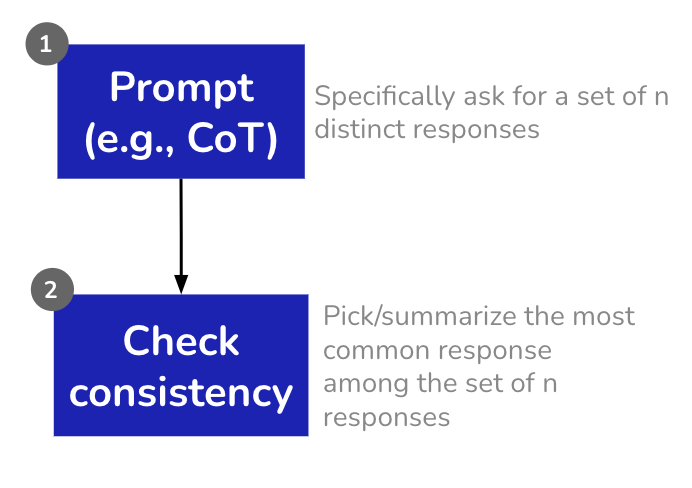

Policy-related inquiries (coupons, refunds, loyalty points, etc.) require strict alignment with company-established guidelines.

By leveraging Self-consistency prompting technique, reliability shall be ensured by generating multiple responses and selecting the most policy-compliant answer.

Self-Consistency prompting generates multiple independent reasoning paths or answers.

Instead of relying on a single completion, this approach helps:
- Reduce randomness/variability.
- Capture diverse, but valid expressions of the same truth.
- Improve response quality through answer aggregation or selection
- Provides guardrails to ensure factual, policy-aligned completions

For self-consistency check, we follow a two-fold approach:
- In the first layer, the LLM generates 3 consistent answers to the user query regarding the policy.
- This is then fed to the next LLM layer, which selects the most frequent/consistent solution from the AI-generated response to create the final user response.

System message for the generation

In [30]:
# System message
generation_system_message = """
You are a knowledgeable assistant responsible for answering customer queries regarding company policies.
The context for responding accurately is outlined below:
---
Context:
- Promotional Coupons are valid for 30 days from the date of issuance.
- Loyalty Points can be redeemed against future purchases once accumulated above 100 points.
- Refund requests must adhere to our policy which stipulates that items must be returned within 7 days of delivery for a full refund.
---
You will be presented with a customer question about policy.
Generate 3 distinct, yet consistent answers to the question based on the above context.
Arrange the answers in numbered bullet points.
"""

Define the template for the user question regarding the policy

In [31]:
# Create the user message prompt template
user_message_template = """
Policy Question:
{question}
"""

In [32]:
# Sample policy-related user query
policy_question = "How do loyalty points work and when do they expire?"

Defining the prompt template for generating 3 answers to the policy-related user query

In [33]:
# Create the prompt template for the answer generations
answers_prompt = [
    {'role': 'system', 'content': generation_system_message},
    {'role': 'user', 'content': user_message_template.format(
         question=policy_question
     )}
]

# Response to get 3 generated answers for the policy-related user query
response = client.chat.completions.create(
    model=model_name,
    messages=answers_prompt,
    temperature=0
)

generated_answers = response.choices[0].message.content
print("Generated Answers:\n", generated_answers)

Generated Answers:
 1. Loyalty points are earned with your purchases and can be redeemed for future purchases once you accumulate more than 100 points. Currently, there is no expiration date for loyalty points, so you can use them whenever you reach the required amount.

2. You can earn loyalty points with your purchases, and once you have over 100 points, you can redeem them for discounts on future orders. As of now, loyalty points do not expire, allowing you to save them for as long as you need.

3. Loyalty points accumulate with your purchases, and you can start redeeming them once you have more than 100 points. There is no expiration date for these points, so you can use them at your convenience without worrying about losing them.


Let's define the system message that will check the previously generated responses and aggregate them based on the frequently occuring response

In [34]:
# Define the consistency system message for aggregating responses
consistency_system_message = """
You are a helpful assistant tasked to answer queries regarding company policies.
You will be presented with a question as well as 3 AI-generated answers to that question in the user input.
Observe the answers mentioned, and choose the answer that occurs most frequently among them.
Present only the most frequent solution in the following format.
Final Answer:
"""

In [35]:
#  Consistency check - for the final response regarding the policy
consistency_prompt = [
    {'role': 'system', 'content': consistency_system_message},
    {'role': 'user', 'content': f"""
Question: {policy_question}
Answers: {generated_answers}
"""}
]

# Response to get the most consistent answer for the policy-related user query
response = client.chat.completions.create(
    model=model_name,
    messages=consistency_prompt,
    temperature=0
)

final_answer = response.choices[0].message.content
print("\nFinal Policy Answer:\n", final_answer)


Final Policy Answer:
 Final Answer: Loyalty points are earned with your purchases and can be redeemed for future purchases once you accumulate more than 100 points. Currently, there is no expiration date for loyalty points, so you can use them whenever you reach the required amount.


 - Example 2

In [36]:
# Sample policy-related user query
policy_question = "What are the conditions for refund eligibility?"

# Create the prompt template for the answer generations
answers_prompt = [
    {'role': 'system', 'content': generation_system_message},
    {'role': 'user', 'content': user_message_template.format(
         question=policy_question
     )}
]

# Response to get 3 generated answers for the policy-related user query
response = client.chat.completions.create(
    model=model_name,
    messages=answers_prompt,
    temperature=0
)

generated_answers = response.choices[0].message.content
print("Generated Answers:\n", generated_answers)

Generated Answers:
 1. To be eligible for a full refund, items must be returned within 7 days of delivery. Please ensure that the items are in their original condition when returning.

2. Our refund policy requires that you return the purchased items within 7 days of receiving them. Only items returned within this timeframe will qualify for a full refund.

3. For a full refund, items must be returned within 7 days from the date of delivery. Make sure to follow this timeframe to ensure your refund request is processed successfully.


In [37]:
#  Consistency check - for the final response regarding the policy
consistency_prompt = [
    {'role': 'system', 'content': consistency_system_message},
    {'role': 'user', 'content': f"""
Question: {policy_question}
Answers: {generated_answers}
"""}
]

# Response to get the most consistent answer for the policy-related user query
response = client.chat.completions.create(
    model=model_name,
    messages=consistency_prompt,
    temperature=0
)

final_answer = response.choices[0].message.content
print("\nFinal Policy Answer:\n", final_answer)


Final Policy Answer:
 Final Answer: To be eligible for a full refund, items must be returned within 7 days of delivery. Please ensure that the items are in their original condition when returning.


### Handling Complaints : Rephrase & Respond

In the Rephrase & Respond method of prompt engineering, we ask the LLM to rephrase the original user question to a format that will enable it to answer better.

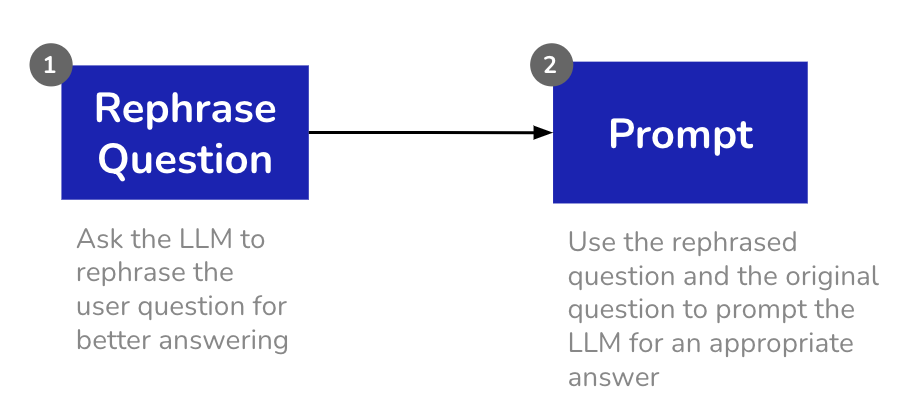

When users express dissatisfaction, it's essential for to respond with politeness and genuine willingness to help.

The **Rephrase & Respond method** will be used to rephrase customer inquiries to enhance response quality - this technique will interpret the customer's emotional tone and craft replies that address concerns while demonstrating understanding, ensuring consistency in sensitive interactions.

In [38]:
# Rephrase System Message
rephrase_system_message = """
You are a customer complaint specialist for a food/grocery delivery platform.
Your task is to rephrase customer complaints to:
1. Clarify the core issue(s)
2. Identify implicit concerns
3. Structure the complaint for optimal resolution
4. Maintain all original details

Rephrasing Guidelines:
- Convert emotional language into actionable descriptors
- Separate multiple issues into distinct points
- Highlight any safety/quality concerns
- Preserve all factual details

Only output the rephrased complaint - do not respond yet.
"""

In [39]:
# Sample user complaint
user_complaint = """
I'm furious! My order arrived 90 minutes late, the ice cream melted completely,
and the Dal Makhani was spilled all over the bag. This is unacceptable service!
"""

In [40]:
# Create the prompt template for the Rephrase method
rephrase_prompt = [
    {'role': 'system', 'content': rephrase_system_message},
    {'role': 'user', 'content': f"Complaint:\n{user_complaint}"}
]

In [41]:
# Get the model reesponse using the Rephrase method
response = client.chat.completions.create(
    model=model_name,
    messages=rephrase_prompt,
    temperature=0
)

rephrased_complaint = response.choices[0].message.content
print("\nRephrased Complaint:\n", rephrased_complaint)


Rephrased Complaint:
 Complaint:

1. My order was delivered 90 minutes later than the expected time.
2. The ice cream in the order melted completely due to the delay.
3. The Dal Makhani spilled inside the delivery bag, causing a mess.
4. I find this level of service unacceptable and am concerned about the quality of the food upon delivery.


In [42]:
# System Message for Respond method

respond_system_message = """
You are a senior customer support agent. Address complaints with:

**Resolution Protocol**:
1. Acknowledge each issue individually
2. Apologize sincerely
3. Explain corrective actions
4. Offer compensation where appropriate

**Compensation Policy**:
- Late deliveries: 20% refund or ₹100 coupon
- Spoiled food: Full refund + replacement
- Spillage: 50% refund + loyalty points

Format:
1. [Summary of understood issues]
2. [Apology]
3. [Resolution for each issue]
4. [Goodwill gesture]
"""

In [43]:
# Create the prompt template for the Rephrase & Respond Method
response_prompt = [
    {'role': 'system', 'content': respond_system_message},
    {'role': 'user', 'content': f"""
Original Complaint:
{user_complaint}

Rephrased Complaint:
{rephrased_complaint}
"""}
]

We'll now extract the LLM output for the final response generation

In [44]:
# Get the model output for the Response Generation

response = client.chat.completions.create(
    model=model_name,
    messages=response_prompt,
    temperature=0
)

final_response = response.choices[0].message.content
print("\nFinal Response:\n", final_response)


Final Response:
 1. I understand that your order was delivered 90 minutes late, the ice cream melted completely, and the Dal Makhani spilled inside the delivery bag, causing a mess. I can see why you are frustrated with the service you received.

2. I sincerely apologize for the inconvenience and disappointment this has caused you. We strive to provide timely and quality service, and it is clear we fell short in this instance.

3. To address your concerns:
   - For the late delivery, I will issue you a 20% refund or a ₹100 coupon, whichever you prefer.
   - Since the ice cream melted completely, I will provide you with a full refund for that item along with a replacement.
   - Regarding the spilled Dal Makhani, I will issue a 50% refund for that item and add loyalty points to your account as a gesture of goodwill.

4. As a goodwill gesture, I would like to offer you an additional ₹100 coupon for your next order. We appreciate your understanding and hope to serve you better in the futu

- Example 2

In [45]:
user_complaint_2 = """
I am quite unhappy with the quality of the service, my order arrived 100 minutes late.
The bread pakora that I ordered was extremely soggy.
The malai kofta was spilled all over the packet.
I ordered a lachcha parantha, and got a garlic nan instead.
"""

# Create the prompt template for the Rephrase method
rephrase_prompt = [
    {'role': 'system', 'content': rephrase_system_message},
    {'role': 'user', 'content': f"Complaint:\n{user_complaint_2}"}
]

# Get the model reesponse using the Rephrase method
response = client.chat.completions.create(
    model=model_name,
    messages=rephrase_prompt,
    temperature=0
)

rephrased_complaint = response.choices[0].message.content
print("\nRephrased Complaint:\n", rephrased_complaint)


Rephrased Complaint:
 Complaint:

1. The delivery of my order was delayed by 100 minutes, which is unacceptable.
2. The bread pakora I received was excessively soggy, raising concerns about its quality.
3. The malai kofta was spilled inside the packaging, indicating a lack of proper handling.
4. Instead of the lachcha parantha I ordered, I received a garlic naan, which is not what I requested.


In [46]:
# Create the prompt template for the Rephrase & Respond Method
response_prompt = [
    {'role': 'system', 'content': respond_system_message},
    {'role': 'user', 'content': f"""
Original Complaint:
{user_complaint}

Rephrased Complaint:
{rephrased_complaint}
"""}
]

# Get the model output for the Response Generation
response = client.chat.completions.create(
    model=model_name,
    messages=response_prompt,
    temperature=0
)

final_response = response.choices[0].message.content
print("\nFinal Response:\n", final_response)


Final Response:
 1. I understand that your order was delayed by 100 minutes, the bread pakora was excessively soggy, the malai kofta was spilled, and you received garlic naan instead of the lachcha parantha you ordered.

2. I sincerely apologize for the inconvenience and frustration this has caused you. We strive to provide timely and quality service, and it’s clear we fell short in your case.

3. To address these issues:
   - For the late delivery, I will issue you a 20% refund or a ₹100 coupon, whichever you prefer.
   - Regarding the soggy bread pakora, I will ensure that our kitchen reviews the preparation process to maintain quality.
   - For the spilled malai kofta, I will provide a full refund along with a replacement.
   - Lastly, I will ensure that our team is reminded to double-check orders to prevent mix-ups like the garlic naan instead of the lachcha parantha.

4. As a goodwill gesture, I would like to offer you an additional ₹100 coupon for your next order. Thank you for 

## Output Validation

### LLM-as-a-Judge Evaluation

In the LLM-as-a-Judge method, an LLM is used to rate the performance of the LLM used in the original task.

When LLMs are used to evaluate output, the system message should clearly define the **rubrics** used for evaluation and the **key aspects** of the output that should be evaluated.

In this method, once the LLM generates responses to various customer complaints, another LLM is tasked with evaluating them against a structured evaluation rubric to ensure the quality and effectiveness of these responses.

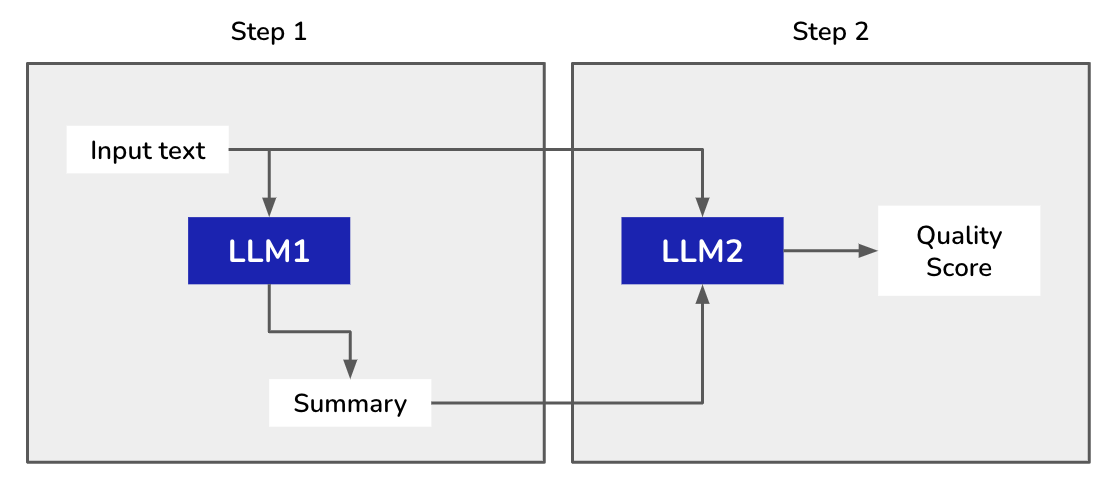

We will use the user complaint and chat response from the previous section and rate them using the LLM-as-a-judge methodology.

In [47]:
# Input user complaint query
user_complaint = """
I'm furious! My order arrived 90 minutes late, the ice cream melted completely,
and the dal was spilled all over the bag. This is unacceptable service!
"""

In [48]:
# Sample chat response from LLM
chat_response = """
I understand that your order was delivered 90 minutes late, the ice cream melted completely, and the dal spilled inside the delivery bag, causing a mess.
I can see why you are upset, and I appreciate you bringing these issues to our attention.

I sincerely apologize for the inconvenience and frustration this has caused you.
We strive to provide timely and quality service, and it is clear we fell short in this instance.

To address your concerns:
   - For the late delivery, I will issue you a 20% refund or a ₹100 coupon, whichever you prefer.
   - Since the ice cream melted completely, I will provide you with a full refund for that item along with a replacement.
   - Regarding the spilled dal, I will offer you a 50% refund for that item, along with some loyalty points as a gesture of goodwill.

As a token of our commitment to improving your experience, I would like to offer you an additional ₹100 coupon for your next order.
We value your feedback and hope to serve you better in the future.
"""

In [49]:
# Define the user message prompt template

rater_user_message = f"""

###User Complaint :
{user_complaint}

###Chat Response :
{chat_response}
"""

In [50]:
# Define the system message for LLM-as-a-Judge evaluation
# Provide the role, context, evluation criteria and the metrics, and detailed instructions

rater_system_message = """
You are tasked with rating AI-generated customer support responses to user complaints regarding service quality for an online food and grocery delivery platform.
You will be presented with a user's complaint and an AI-generated response to the complaint as the input.
In the input, the user complaint will begin with ###User Complaint while the AI-generated response will begin with ###Chat Response.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the chat response.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The response should effectively address and acknowledge all aspects of the user's complaint, offering solutions and demonstrating politeness, helpfulness, and empathy.

Instructions:
1. First write down the steps that are needed to evaluate the chat response as per the metric.
2. Give a step-by-step explanation if the chat response adheres to the metric considering the user complaint as the input.
3. Evaluate whether the response acknowledges each of the user's concerns satisfactorily.
4. Assess whether the response offers concrete solutions or compensation where applicable.
5. Determine if the tone of the response is polite, helpful, and empathetic.
6. Use the previous information to rate the chat response using the evaluation criteria and assign a score.
"""

In [51]:
# Define the LLM-as-a-Judge prompt template
rater_prompt = [
    {'role': 'system', 'content': rater_system_message},
    {'role': 'user', 'content': rater_user_message}
]

In [52]:
### 2. Execution with GPT-4o as Judge

rater_model =  'gpt-4o'

response = client.chat.completions.create(
    model=rater_model,
    messages=rater_prompt
)

print("LLM-as-Judge Evaluation:")
print(response.choices[0].message.content)

LLM-as-Judge Evaluation:
1. Steps to evaluate the chat response according to the metric:
   - Identify and list all aspects of the user's complaint.
   - Check if the response acknowledges each of the identified concerns.
   - Evaluate whether the response provides solutions or compensation for the complaints.
   - Assess if the tone of the chat response is polite, empathetic, and helpful.
   - Use the evaluation criteria to rate the response.

2. Explanation of adherence to the metric:
   - The user has three main complaints: late delivery, melted ice cream, and spilled dal.
   - The chat response acknowledges each of these issues clearly and directly. It repeats the main points of the user's complaint, showing understanding and ensuring that each issue is noticed.
   
3. Acknowledgement Assessment:
   - The response successfully acknowledges the late delivery, melted ice cream, and spilled dal complaints. Each point raised by the user is recognized in the response.

4. Solution/Compe

 - Example 2

In [53]:
user_complaint_2 = """
I am quite unhappy with the quality of the service, my order arrived 100 minutes late.
The bread pakora that I ordered was extremely soggy.
The malai kofta was spilled all over the packet.
I ordered a lachcha parantha, and got a garlic nan instead.
"""

chat_response_2 = """
1. I understand that your order was delayed by 100 minutes, the bread pakora was excessively soggy, the malai kofta was spilled, and you received garlic naan instead of the lachcha parantha you ordered.

2. I sincerely apologize for the inconvenience and frustration this has caused you. We strive to provide timely and quality service, and it’s clear we fell short in your case.

3. To address these issues:
   - For the late delivery, I will issue you a 20% refund or a ₹100 coupon, whichever you prefer.
   - Regarding the soggy bread pakora, I will ensure that our kitchen is made aware of this quality concern to prevent it from happening again.
   - For the spilled malai kofta, I will provide you with a full refund and a replacement for your next order.
   - Lastly, I will ensure that the correct item is sent out in the future, and I will personally oversee the order to ensure accuracy.

4. As a goodwill gesture, I would like to offer you an additional ₹100 coupon for your next order. We appreciate your understanding and hope to serve you better in the future.
"""

# Define the user message prompt template

rater_user_message_2 = f"""

###User Complaint :
{user_complaint_2}

###Chat Response :
{chat_response_2}
"""

# Define the LLM-as-a-Judge prompt template
rater_prompt_2 = [
    {'role': 'system', 'content': rater_system_message},
    {'role': 'user', 'content': rater_user_message_2}
]

### 2. Execution with GPT-4o as Judge

rater_model =  'gpt-4o'

response = client.chat.completions.create(
    model=rater_model,
    messages=rater_prompt_2
)

print("LLM-as-Judge Evaluation:")
print(response.choices[0].message.content)

LLM-as-Judge Evaluation:
**Steps to Evaluate the Chat Response:**

1. Identify the key concerns in the user's complaint.
2. Determine if the chat response acknowledges each concern raised by the user.
3. Check if the response provides concrete solutions or compensation for each problem.
4. Analyze the tone of the response to see if it is polite, helpful, and empathetic.
5. Assign a score based on the extent to which the response adheres to the metric.

**Step-by-Step Evaluation:**

1. **Key Concerns from User Complaint:**
   - Late delivery (100 minutes late)
   - Soggy bread pakora
   - Malai kofta spilled all over the packet
   - Wrong item received (garlic naan instead of lachcha parantha)

2. **Acknowledgment of Concerns:**
   - The response acknowledges all of the user's concerns: the late delivery, soggy bread pakora, spilled malai kofta, and wrong item (garlic naan) instead of the ordered lachcha parantha.

3. **Solutions or Compensation Offered:**
   - The response offers a 20%

### Guardrails Validation

The guardrails layer is generally implemented to ensure compliance with regulatory standards, enhance system security, and facilitate safe operational procedures by providing a framework that identifies, mitigates, and monitors risks.

In the following implementations, we define the following functions that perform Guardrail validation
- `validate_tone`: function that analyses the responses for appropriate empathy score levels
- `detect_pii`: function that detects personally identifiable information such as emails, phone numbers, or credit cards

In [54]:
# Empathy & Tone Checker
def validate_tone(response: str) -> dict:
    """
    Analyzes response for appropriate empathy levels
    Returns: {'empathy_score': 0-5, 'red_flags': list[str]}
    """
    empathy_phrases = [
        'apologize', 'sorry', 'understand',
        'frustrating', 'appreciate', 'thank you'
    ]

    red_flags = [
        'unacceptable', 'your fault',
        'not our problem', 'cannot help'
    ]

    score = sum(1 for phrase in empathy_phrases if phrase in response.lower())
    flags = [flag for flag in red_flags if flag in response.lower()]

    return {
        'empathy_score': min(5, score),  # Cap at 5
        'red_flags': flags
    }

In [55]:
# Test Case - Poor Tone Identification
rude_response = "This is what you ordered. No refunds."
#assert validate_tone(rude_response)['empathy_score'] <2
print(validate_tone(rude_response))

{'empathy_score': 0, 'red_flags': []}


In [56]:
# PII (Personally Identifiable Information) Exposure Prevention

def detect_pii(text: str) -> dict:
    """
    PII detection
    Checks for:
    - Emails (contains '@' and '.')
    - Phone numbers (sequence of 10+ digits)
    - Credit cards (sequence of 15-16 digits, with optional separators)
    """
    pii_found = []
    sanitized = text
    action_required = False

    # Split text while preserving whitespace for accurate replacement
    words = text.split(' ')

    for word in words:
        lower_word = word.lower()

        # Email check (basic pattern)
        if '@' in word and '.' in word:
            pii_found.append('email')
            sanitized = sanitized.replace(word, '[EMAIL_REDACTED]')
            action_required = True

        # Phone number check (10+ consecutive digits)
        clean_phone = ''.join(c for c in word if c.isdigit())
        if len(clean_phone) >= 10:
            pii_found.append('phone')
            sanitized = sanitized.replace(word, '[PHONE_REDACTED]')
            action_required = True

        # Credit card check (15-16 digits with possible separators)
        clean_card = ''.join(c for c in word if c.isdigit())
        if len(clean_card) in (15, 16):
            pii_found.append('credit_card')
            sanitized = sanitized.replace(word, '[CARD_REDACTED]')
            action_required = True

    return {
        'contains_pii': len(pii_found) > 0,
        'pii_types': list(set(pii_found)),  # Remove duplicates
        'sanitized_text': sanitized,
        'action_required': action_required
    }

In [57]:
# Example usage:
complaint = """
My card 4111 1111 1111 1111 was charged twice.
Call me at 5551234567 or email refunds@example.com
"""

result = detect_pii(complaint)
print(result)

{'contains_pii': True, 'pii_types': ['email', 'phone'], 'sanitized_text': '\nMy card 4111 1111 1111 1111 was charged twice.\nCall me at [PHONE_REDACTED] or email [EMAIL_REDACTED]', 'action_required': True}


In [58]:
print("Sanitized text:", result['sanitized_text'])
print("PII types found:", result['pii_types'])
print("Action required:", result['action_required'])

Sanitized text: 
My card 4111 1111 1111 1111 was charged twice.
Call me at [PHONE_REDACTED] or email [EMAIL_REDACTED]
PII types found: ['email', 'phone']
Action required: True
